In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans


# **Airlines**

In [ ]:
# Importing dataset
airline=pd.read_csv("/content/EastWestAirlines.csv")
airline


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# Checking the information of the data
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
# Renaming the columns

airline.rename({"ID#":"id"},axis=1,inplace=True)
airline.rename({"Award?":"Award"},axis=1,inplace=True)

In [ ]:
airline

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# As given in problem, we have to assign values for column names - "cc1_miles" , "cc2_miles" , "cc3_miles" as follows :
#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over 50,000


# As we dont know the exact no we can take the median number to replace the unique number
#1 = 2500
#2 = 7500
#3 = 17500
#4 = 37500
#5 = 75000

airline["cc1_miles"].unique()
airline["cc2_miles"].unique()
airline["cc3_miles"].unique()

array([1, 3, 2, 4, 5])

In [ ]:
# We will replace 1,2,3,4,5 with 2500, 7500,17500, 37500 ,75000

airline["cc1_miles"]=airline["cc1_miles"].replace([1, 3, 2, 4, 5],[2500,7500,17500,37500,75000])
airline["cc2_miles"]=airline["cc2_miles"].replace([ 1,2,3,4,5 ],[2500,7500,17500,37500,75000])
airline["cc3_miles"]=airline["cc3_miles"].replace([ 1,2,3,4,5 ],[2500,7500,17500,37500,75000])

# **DBSCAN**

In [ ]:
# Transforming the data

from sklearn.preprocessing import StandardScaler

stscaler=StandardScaler().fit_transform(airline)
stscaler

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
# Creating cluster

from sklearn.cluster import DBSCAN

db=DBSCAN(eps=1,min_samples=6).fit(stscaler)

In [ ]:
db.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Saving the labels in Dataframe

db1=pd.DataFrame(db.labels_,columns=["Cluster_DB"])
db1.head()

,Cluster_DB
0,0
1,0
2,0
3,0
4,3


In [ ]:
## Adding the cluster column in the dataset

airline1=pd.concat([airline,db1],axis=1)
airline1.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_DB
0,1,28143,0,2500,2500,2500,174,1,0,0,7000,0,0
1,2,19244,0,2500,2500,2500,215,2,0,0,6968,0,0
2,3,41354,0,2500,2500,2500,4123,4,0,0,7034,0,0
3,4,14776,0,2500,2500,2500,500,1,0,0,6952,0,0
4,5,97752,0,37500,2500,2500,43300,26,2077,4,6935,1,3


# **Hierarchical clustering**

In [ ]:
# Transforming the data.

from sklearn.preprocessing import MinMaxScaler

MinMax=MinMaxScaler().fit_transform(airline)
MinMax

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [ ]:
# Creating the dendrogram

plt.figure(figsize=(13,8))
dendrogram=sch.dendrogram(sch.linkage(airline,method="average"))

In [ ]:
# Crearing cluster

from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")
hc.fit_predict(MinMax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
# Cheking the labels
hc.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
# saving labels to dataframe

hc1=pd.DataFrame(hc.labels_,columns=["Cluster HC"])
hc1

,Cluster HC
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [ ]:
## Adding cluster column to dataset

air1=pd.concat([airline,hc1],axis=1)
air1.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster HC
0,1,28143,0,2500,2500,2500,174,1,0,0,7000,0,1
1,2,19244,0,2500,2500,2500,215,2,0,0,6968,0,1
2,3,41354,0,2500,2500,2500,4123,4,0,0,7034,0,1
3,4,14776,0,2500,2500,2500,500,1,0,0,6952,0,1
4,5,97752,0,37500,2500,2500,43300,26,2077,4,6935,1,0


# **K-Means Clustering**

In [ ]:
# Transforming
sc=StandardScaler().fit_transform(airline)

In [ ]:
# Creating cluter

from sklearn.cluster import KMeans

kmean=KMeans(n_clusters=12,random_state=0).fit(sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmean.inertia_

15483.22623439227

In [ ]:
wcss=[] #within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1,17):
  kmean=KMeans(n_clusters=i,random_state=0).fit(sc)
  wcss.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[47988.000000000044,
 39199.46126764232,
 34639.91303890514,
 30494.714443465877,
 27243.486007288368,
 24193.082527425708,
 22420.422886972803,
 19491.752603698624,
 18174.525519948413,
 17200.266149265735,
 16176.093662927546,
 15483.22623439227,
 14679.710352162032,
 14012.28401506845,
 13498.113797981545,
 12944.097508222416]

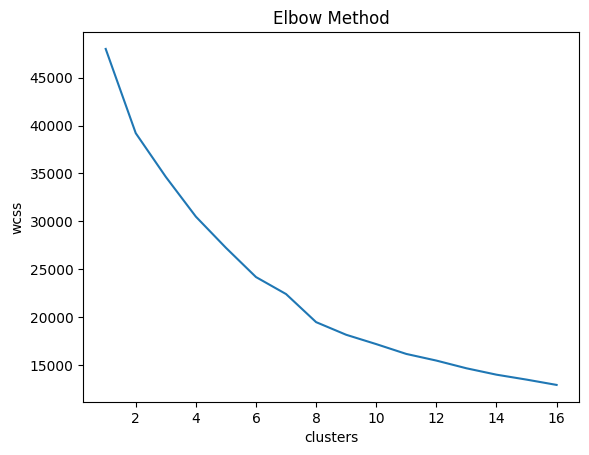

In [ ]:
plt.plot(range(1,17),wcss)
plt.title("Elbow Method")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmean.labels_

array([1, 1, 1, ..., 2, 3, 3], dtype=int32)

In [ ]:
# saving labels to data frame

KM=pd.DataFrame(kmean.labels_,columns=["Cluster KM"])

In [ ]:
# Adding cluster column in dataset

air2=pd.concat([airline,KM],axis=1)
air2.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster KM
0,1,28143,0,2500,2500,2500,174,1,0,0,7000,0,1
1,2,19244,0,2500,2500,2500,215,2,0,0,6968,0,1
2,3,41354,0,2500,2500,2500,4123,4,0,0,7034,0,1
3,4,14776,0,2500,2500,2500,500,1,0,0,6952,0,1
4,5,97752,0,37500,2500,2500,43300,26,2077,4,6935,1,8


# **Crime Data**

In [ ]:
# importing the dataset
crime=pd.read_csv("/content/crime_data.csv")


In [ ]:
#Checking the top 5 columns
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
#Droping thr unnamed column

crime.drop(["Unnamed: 0"],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# **DBSCAN**

In [ ]:
# converting data into Array

array=crime.values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalising the data

stdscaler=StandardScaler().fit_transform(array)

In [ ]:
# Creating the cluster

from sklearn.cluster import DBSCAN

DB=DBSCAN(eps=1,min_samples=3)
DB.fit(stdscaler)

DBSCAN(eps=1, min_samples=3)

In [ ]:
## Noisy data are indicated by -1
DB.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Saving the clusters in the dataframe

p=pd.DataFrame(DB.labels_,columns=["Cluster"])
p.value_counts()

Cluster
 1         28
-1         10
 0          6
 2          3
 3          3
dtype: int64

In [ ]:
# Adding the cluster column in the data set

crime1=pd.concat([crime,p],axis=1)
crime1

# **Hierarchy Clustering**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data

minmax=MinMaxScaler().fit_transform(crime)
hc=pd.DataFrame(minmax,columns=crime.columns)
hc

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


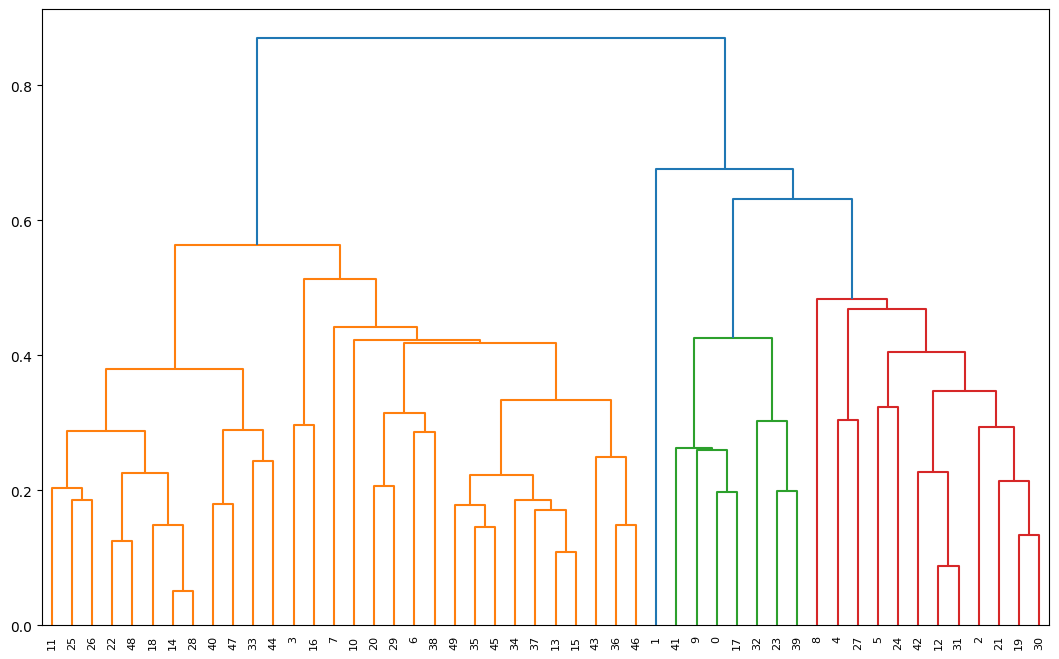

In [ ]:
## Creating dendrogram

plt.figure(figsize=(13,8))
dendrogram=sch.dendrogram(sch.linkage(hc,method="average"))

In [ ]:
# Now Creating Cluster

from sklearn.cluster import AgglomerativeClustering

hc1=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average") # Cluster creation
hc1.fit_predict(hc) # fitting the cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0])

In [ ]:
hc1.labels_

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0])

In [ ]:
## Adding the cluster to dataframe

hc2=pd.DataFrame(hc1.labels_,columns=["Cluster_HC"])
hc2

In [ ]:
crime2=pd.concat([crime,hc2],axis=1)
crime2.head()


,Murder,Assault,UrbanPop,Rape,Cluster_HC
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


# **K-Means Clustering**

In [ ]:
# Transforming

scaler=StandardScaler().fit_transform(crime)
scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=0).fit(scaler)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_  #Inertia measures how well a dataset was clustered by K-Means.

57.55425863091105

In [ ]:
wcss=[] #within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1,8):
  kmeans=KMeans(n_clusters=i,random_state=0).fit(scaler)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976]

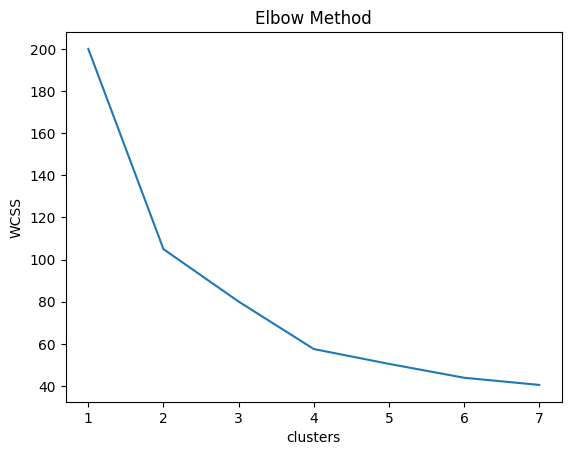

In [ ]:
plt.plot(range(1,8),wcss)
plt.title("Elbow Method")
plt.xlabel("clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans.labels_

array([0, 6, 4, 5, 6, 6, 2, 2, 4, 0, 2, 5, 4, 1, 3, 5, 5, 0, 3, 4, 2, 6,
       5, 0, 1, 5, 5, 6, 3, 2, 4, 4, 0, 3, 1, 1, 1, 2, 2, 0, 3, 0, 4, 2,
       3, 1, 1, 3, 5, 5], dtype=int32)

In [ ]:
# Saving the clusters in the dataframe

km=pd.DataFrame(kmeans.labels_,columns=["cluster Kmeans"])
km.head()

,cluster Kmeans
0,0
1,6
2,4
3,5
4,6


In [ ]:
# Adding the cluster to dataset

crime3=pd.concat([crime,km],axis=1)
crime3.head()

,Murder,Assault,UrbanPop,Rape,cluster Kmeans
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,6
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,5
4,9.0,276,91,40.6,6
